# Titanic Survival Prediction using FEDOT and LLM

This notebook demonstrates the process of analyzing the Titanic dataset and predicting passenger survival using the FEDOT framework enhanced with Large Language Models (LLM).


In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.sep.join(['..', '..'])))
if module_path not in sys.path:
    sys.path.append(module_path)

from langchain.chat_models import init_chat_model
from fedot_llm.main import FedotAI

In [2]:
dataset_path = '../../datasets/titanic'

In [3]:
description="""The sinking of the Titanic is one of the most infamous shipwrecks in history.\n\n
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable”
RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard,
resulting in the death of 1502 out of 2224 passengers and crew.\n\n
While there was some element of luck involved in surviving,
it seems some groups of people were more likely to survive than others.\n\n
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?”
using passenger data (ie name, age, gender, socio-economic class, etc).\n\n
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc.
One dataset is titled train.csv and the other is titled test.csv.\n\n
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly,
will reveal whether they survived or not, also known as the “ground truth”.\n\n
The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger.
It’s your job to predict these outcomes.\n\n
Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.\n\n
Check out the “Data” tab to explore the datasets even further.
Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.
\n\nDataset Description
\nOverview\n
The data has been split into two groups:\n\n
training set (train.csv)\n
test set (test.csv)\n
The training set should be used to build your machine learning models.
For the training set, we provide the outcome (also known as the “ground truth”) for each passenger.
Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.\n\n
The test set should be used to see how well your model performs on unseen data.
For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes.
For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
\n\nWe also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
\n"""

# Progress:
- [x] Define Dataset Name
- [x] Define Dataset Description
- [x] Define Dataset Goal
- [x] Define Train Split
- [x] Define Test Split
- [x] Define Target Column
- [x] Define Task Type
- [x] Create Column Descriptions And Define Columns Category
- [x] Fedot makes predictions
- [x] Fedot Analyze Results

# Model Pipeline

The pipeline consists of:
### Stages Description
1. **Depth: 2** - The model has a depth of 2, indicating the number of layers in the neural network.
2. **Length: 3** - Each layer in the model has a length of 3, which could represent the number of neurons or features at each stage.
3. **Nodes:**
	* **catboost**:
		+ **allow_writing_files**: False
		+ **verbose**: False
		+ **iterations**: 1000
		+ **use_eval_set**: False
		+ **use_best_model**: False
		+ **early_stopping_rounds**: None
		+ **n_jobs**: 12 - This stage uses the CatBoost algorithm with specified parameters.
	* **scaling**:
		+ No additional information provided, indicating default scaling parameters or a simple scaling method used.
	* **pca**:
		+ **svd_solver**: 'full'
		+ **n_components**: 0.7 - This stage applies Principal Component Analysis (PCA) with the specified SVD solver and number of components.

# Model Metrics
| Metric | Value |
| --- | --- |
| **roc_auc** | 0.892 |
| **accuracy** | 0.827 |

### Metrics Description

*   **ROC AUC**: The Receiver Operating Characteristic Area Under Curve (AUC) score measures the model's ability to distinguish between positive and negative classes. A higher value indicates a better classifier.
*   **Accuracy**: This metric represents the proportion of correctly classified instances out of total instances in the dataset. It gives an idea of how well the model performs overall, without considering class imbalance or specific false positives/negatives.

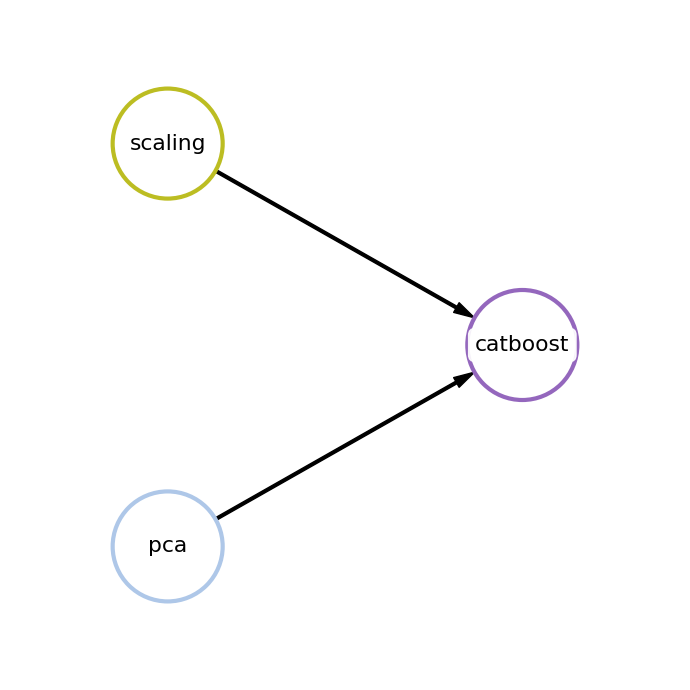

In [4]:
fedot_ai =  FedotAI(
        dataset=dataset_path,
        model=init_chat_model(
                        model="llama3.1",
                        model_provider='ollama'),
        output='jupyter')
predictions = await fedot_ai.predict(description)

In [5]:
predictions.predictions[-10:-30:-2]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

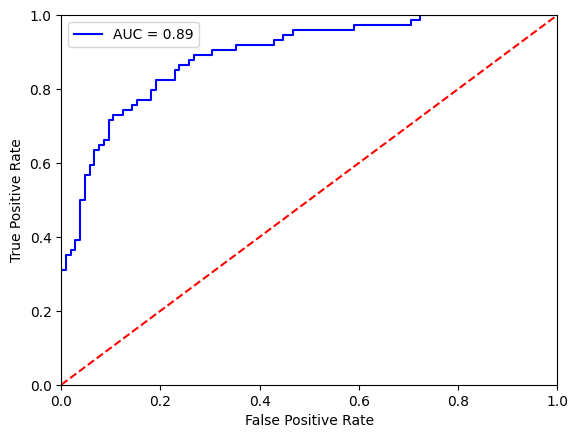

In [6]:
predictions.auto_model.plot_prediction()

In [7]:
path_to_save = f'{module_path}/saved_pipelines'
predictions.best_pipeline.save(path=path_to_save, create_subdir=True, is_datetime_in_path=True)

('{\n    "total_pipeline_operations": [\n        "scaling",\n        "pca",\n        "catboost"\n    ],\n    "depth": 2,\n    "nodes": [\n        {\n            "operation_id": 1,\n            "operation_type": "scaling",\n            "operation_name": "ScalingImplementation",\n            "custom_params": {},\n            "params": {},\n            "nodes_from": [],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_1.pkl"\n            ],\n            "rating": null\n        },\n        {\n            "operation_id": 2,\n            "operation_type": "pca",\n            "operation_name": "PCAImplementation",\n            "custom_params": {\n                "svd_solver": "full",\n                "n_components": 0.7\n            },\n            "params": {\n                "svd_solver": "full",\n                "n_components": 0.7\n            },\n            "nodes_from": [],\n            "fitted_operation_path": [\n               